In [1]:
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
import requests #download from football data
import io 
from __future__ import division
import seaborn as sns
%matplotlib inline

### Load the data

In [4]:
url = "http://www.football-data.co.uk/mmz4281/1718/E0.csv"

In [2]:
testfile = requests.get(url).content
df=pd.read_csv(io.StringIO(testfile.decode('utf-8')))
df.to_csv("./Data/England/E0_17.csv")

NameError: name 'url' is not defined

In [3]:
df = pd.read_csv("./Data/England/E0_17.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF',
       'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A',
       'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH',
       'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2',
       'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU',
       'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh',
       'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,0,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,...,2.32,21,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25
1,1,E0,12/08/17,Brighton,Man City,0,2,A,0,0,...,2.27,20,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29
2,2,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,...,2.23,20,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25
3,3,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,...,1.72,18,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51
4,4,E0,12/08/17,Everton,Stoke,1,0,H,1,0,...,1.76,19,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42


### Cleaning and subsetting required data

Remove betting data as we don't need it for prediction. However, they could be good indicators of a team's current form - should try it out later.

In [6]:
res_16 = df.ix[:,:23]
res_16 = res_16.drop(['Div','Date'],axis=1)
# res_14 = df_14.ix[:,:23]
# res_14 = res_14.drop(['Div','Date'],axis=1)
table_features = df.ix[:,:7]
table_features = table_features.drop(['FTHG','FTAG','Div','Date'],axis=1)
bet_16 = df.ix[:,23:]

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/index

In [7]:
res_16.head()
feature_table = df.ix[:,:23]

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [8]:
res_16.tail()

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
375,375,Newcastle,Chelsea,3,0,H,1,0,H,M Atkinson,...,6,6,2,11,10,4,2,0,1,0
376,376,Southampton,Man City,0,1,A,0,0,D,A Marriner,...,13,3,2,8,10,1,12,3,1,0
377,377,Swansea,Stoke,1,2,A,1,2,A,A Taylor,...,8,11,5,12,9,6,0,1,2,0
378,378,Tottenham,Leicester,5,4,H,1,2,A,C Pawson,...,16,6,9,9,13,4,4,1,2,0
379,379,West Ham,Everton,3,1,H,1,0,H,G Scott,...,14,4,7,10,13,6,6,0,1,0


In [9]:
#Team, Home Goals Score, Away Goals Score, Attack Strength, Home Goals Conceded, Away Goals Conceded, Defensive Strength
table_16 = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',))
table_16 = table_16[:-10]

In [10]:
res_16 = res_16[:-10]
res_16.shape[0]

370

In [11]:
avg_home_scored_16 = res_16.FTHG.sum()*1.0 / res_16.shape[0]
avg_away_scored_16 = res_16.FTAG.sum()*1.0 / res_16.shape[0]
avg_home_conceded_16 = avg_away_scored_16
avg_away_conceded_16 = avg_home_scored_16
print("Average number of goals at home",avg_home_scored_16)
print("Average number of goals away", avg_away_scored_16)
print("Average number of goals conceded at home",avg_home_conceded_16)
print("Average number of goals conceded away",avg_away_conceded_16)

Average number of goals at home 1.518918918918919
Average number of goals away 1.1486486486486487
Average number of goals conceded at home 1.1486486486486487
Average number of goals conceded away 1.518918918918919


In [12]:
res_home = res_16.groupby('HomeTeam')
res_away = res_16.groupby('AwayTeam')

In [13]:
# list(res_home)[0]

In [14]:
table_16.Team = res_home.HomeTeam.apply(pd.DataFrame).columns.values
table_16.HGS = res_home.FTHG.sum().values
table_16.HGC = res_home.FTAG.sum().values
table_16.AGS = res_away.FTAG.sum().values
table_16.AGC = res_away.FTHG.sum().values

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\groupby\groupby.py:1105: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  result = concat(values, axis=self.axis)


In [15]:
#Assuming number of home games = number of away games
num_games = res_16.shape[0]/20

In [16]:
table_16.HAS = (table_16.HGS / num_games) / avg_home_scored_16
table_16.AAS = (table_16.AGS / num_games) / avg_away_scored_16
table_16.HDS = (table_16.HGC / num_games) / avg_home_conceded_16
table_16.ADS = (table_16.AGC / num_games) / avg_away_conceded_16
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,54,19,1.921708,0.894118,20,31,0.941176,1.103203
1,Bournemouth,26,17,0.925267,0.800000,30,30,1.411765,1.067616
2,Brighton,24,10,0.854093,0.470588,25,25,1.176471,0.889680
3,Burnley,15,20,0.533808,0.941176,15,22,0.705882,0.782918
4,Chelsea,30,32,1.067616,1.505882,16,19,0.752941,0.676157
5,Crystal Palace,27,16,0.960854,0.752941,27,28,1.270588,0.996441
6,Everton,28,15,0.996441,0.705882,22,33,1.035294,1.174377
7,Huddersfield,16,12,0.569395,0.564706,24,33,1.129412,1.174377
8,Leicester,25,27,0.889680,1.270588,22,33,1.035294,1.174377
9,Liverpool,41,39,1.459075,1.835294,10,28,0.470588,0.996441


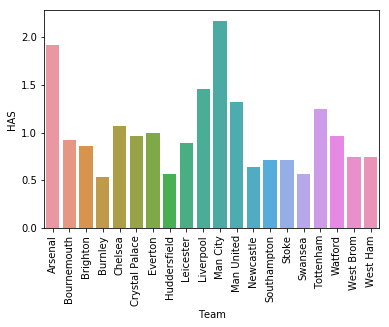

In [17]:
has_plot = sns.barplot(table_16.Team,table_16.HAS)
for item in has_plot.get_xticklabels():
    item.set_rotation(90)

In [18]:
table_16[table_16.Team == "Swansea"]

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
15,Swansea,16,11,0.569395,0.517647,22,32,1.035294,1.13879


In [19]:
''' feature_table contains all the fixtures in the current season.
ftr = full time result
hst = home shots on target
ast = away shots on target
'''

feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['AwayTeam']]['ADS'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS

In [20]:
feature_table.head(20)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS
0,Arsenal,Leicester,H,10,3,1.921708,0.941176,1.270588,1.174377
1,Brighton,Man City,A,2,4,0.854093,1.176471,2.070588,0.462633
2,Chelsea,Burnley,A,6,5,1.067616,0.752941,0.941176,0.782918
3,Crystal Palace,Huddersfield,A,4,6,0.960854,1.270588,0.564706,1.174377
4,Everton,Stoke,H,4,1,0.996441,1.035294,0.611765,1.316726
5,Southampton,Swansea,D,2,0,0.711744,1.176471,0.517647,1.138790
6,Watford,Liverpool,D,4,5,0.960854,1.458824,1.835294,0.996441
7,West Brom,Bournemouth,H,6,2,0.747331,1.364706,0.800000,1.067616
8,Man United,West Ham,H,6,1,1.316726,0.423529,1.129412,1.494662
9,Newcastle,Tottenham,A,3,6,0.640569,0.800000,1.600000,0.711744


In [21]:
def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [22]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)

In [23]:
feature_table = feature_table[:-10] #ONLY FOR WEEK 33. REMOVE FROM 34
feature_table.tail(10)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result
360,West Brom,Tottenham,H,1,5,0.747331,1.364706,1.600000,0.711744,1
361,Arsenal,Burnley,H,8,2,1.921708,0.941176,0.941176,0.782918,1
362,Chelsea,Liverpool,H,4,5,1.067616,0.752941,1.835294,0.996441,1
363,Man City,Huddersfield,D,2,3,2.170819,0.658824,0.564706,1.174377,0
364,Swansea,Southampton,A,3,8,0.569395,1.035294,0.800000,1.067616,-1
365,Chelsea,Huddersfield,D,5,2,1.067616,0.752941,0.564706,1.174377,0
366,Leicester,Arsenal,H,10,7,0.889680,1.035294,0.894118,1.103203,1
367,Man City,Brighton,H,7,3,2.170819,0.658824,0.470588,0.889680,1
368,Tottenham,Newcastle,H,7,3,1.245552,0.564706,0.847059,1.067616,1
369,West Ham,Man United,D,2,6,0.747331,1.176471,1.411765,0.676157,0


In [24]:
X_train = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]]
y_train = feature_table['Result']

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import voting_classifier
from sklearn.svm import LinearSVC

In [26]:
clf1 = RandomForestClassifier()
clf2 = MultinomialNB()
clf3 = XGBClassifier()
clf4 = LinearSVC()

In [27]:
y_pred = clf4.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[0.55263158 0.5        0.47368421 0.52631579 0.59459459 0.45945946
 0.43243243 0.58333333 0.63888889 0.54285714]
0.530419743051322


In [28]:
y_pred = clf1.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[0.47368421 0.52631579 0.5        0.52631579 0.62162162 0.51351351
 0.54054054 0.52777778 0.52777778 0.48571429]
0.52432613064192


In [29]:
y_pred = clf2.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf2, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[0.55263158 0.60526316 0.55263158 0.63157895 0.59459459 0.64864865
 0.7027027  0.55555556 0.58333333 0.48571429]
0.5912654383707016


In [30]:
y_pred = clf3.fit(X_train, y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf3, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-package

[0.47368421 0.5        0.57894737 0.55263158 0.56756757 0.62162162
 0.51351351 0.58333333 0.55555556 0.51428571]
0.5461140463772043


c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Adding Recent Performance

In [31]:
#What is this for?
ht = res_16.loc[40].HomeTeam
at = res_16.loc[40].AwayTeam

In [32]:
feat_table = res_16.sort_index(ascending=False)
feat_table = feat_table[['HomeTeam','AwayTeam','FTR','FTHG','FTAG','HS','AS','HC','AC']]

In [33]:
# Adding next week fixtures
new_fixtures = pd.DataFrame( [['Leicester','Man United','D',0,0,0,0,0,0],
                             ['Burnley','Tottenham','D',0,0,0,0,0,0],
                             ['Swansea','Crystal Palace','D',0,0,0,0,0,0],
                             ['West Ham','Newcastle','D',0,0,0,0,0,0],
                             ['Stoke','West Brom','D',0,0,0,0,0,0],
                             ['Southampton','Huddersfield','D',0,0,0,0,0,0],
                             ['Man City','Bournemouth','D',0,0,0,0,0,0],
                             ['Brighton','Watford','D',0,0,0,0,0,0],
                             ['Everton','Chelsea','D',0,0,0,0,0,0],
                             ['Arsenal','Liverpool','D',0,0,0,0,0,0]],columns=feat_table.columns)

In [34]:
new_feat_table = new_fixtures.append(feat_table,ignore_index=True)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table = new_feat_table.reset_index().drop(['index'], axis=1)
new_feat_table = new_feat_table.sort_index(ascending=False)
# feat_table = n
feat_table = new_feat_table
feat_table.shape

(380, 9)

In [35]:
#Adding k recent performance measures
feat_table["pastHS"] = 0.0
feat_table["pastHC"] = 0.0
feat_table["pastAS"] = 0.0
feat_table["pastAC"] = 0.0
feat_table["pastHG"] = 0.0
feat_table["pastAG"] = 0.0

In [36]:
feat_table.head(12)

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG
379,Leicester,Man United,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
378,Burnley,Tottenham,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
377,Swansea,Crystal Palace,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
376,West Ham,Newcastle,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
375,Stoke,West Brom,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
374,Southampton,Huddersfield,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
373,Man City,Bournemouth,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
372,Brighton,Watford,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
371,Everton,Chelsea,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
370,Arsenal,Liverpool,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# for index,row in feat_table.iterrows():
#     #print row['HomeTeam'], table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values

In [38]:
# Adding k recent performance metrics. Change value of k.
k = 3
for i in range(feat_table.shape[0]-1,-1,-1):
    row = feat_table.loc[i]
    ht = row.HomeTeam
    at = row.AwayTeam
    ht_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
    at_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)

    feat_table.set_value(i, 'pastHC', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k)
    feat_table.set_value(i, 'pastAC', (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k)
    feat_table.set_value(i, 'pastHS', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k)
    feat_table.set_value(i, 'pastAS', (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k)
    feat_table.set_value(i, 'pastHG', (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k)
    feat_table.set_value(i, 'pastAG', (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k)

f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feat_table.iterrows():
    #print row
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['HomeTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['HomeTeam']]['ADS'].values[0])
    
feat_table['HAS'] = f_HAS
feat_table['HDS'] = f_HDS
feat_table['AAS'] = f_AAS
feat_table['ADS'] = f_ADS

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-pa

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [39]:
test_table = feat_table.drop(['FTHG','FTAG','HS','AS','HC','AC'],axis=1)

In [40]:
test_table["Result"] = test_table.apply(lambda row: transformResult(row),axis=1)
test_table.sort_index(inplace=True)

In [39]:
# num_games decides the train-test split
print(feat_table.shape)
num_games = feat_table.shape[0]-10
num_games

(380, 19)


370

In [40]:
X_train = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[0:num_games]
y_train = test_table['Result'].loc[0:num_games]
X_test = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[num_games:]
y_test = test_table['Result'].loc[num_games:]

In [41]:
### Try predictions here too.

# Adding home advantage

In [42]:
test_table["pastCornerDiff"] = (test_table["pastHC"] - test_table["pastAC"])/k
test_table["pastGoalDiff"] = (test_table["pastHG"] - test_table["pastAG"])/k
test_table["pastShotsDiff"] = (test_table["pastHS"] - test_table["pastAG"])/k

In [43]:
''' number of games to exclude in the training set for validation
For example, if 240 games have been played, test_table has 250 fixtures - the last 10 being the ones that haven't
been played. So, we set aside 20 fixtures from the training set containing 240 fixtures for validation.''' 
num_games = feat_table.shape[0]-10
print(num_games)
v_split = 15
n_games = num_games - v_split

370


In [44]:
test_table = test_table.fillna(0)

In [45]:
test_table.head()

,HomeTeam,AwayTeam,FTR,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG,HAS,HDS,AAS,ADS,Result,pastCornerDiff,pastGoalDiff,pastShotsDiff
0,Arsenal,Leicester,H,0.0,0.0,0.0,0.0,0.0,0.0,1.921708,0.941176,0.894118,1.103203,1,0.0,0.0,0.0
1,Brighton,Man City,A,0.0,0.0,0.0,0.0,0.0,0.0,0.854093,1.176471,0.470588,0.889680,-1,0.0,0.0,0.0
2,Chelsea,Burnley,A,0.0,0.0,0.0,0.0,0.0,0.0,1.067616,0.752941,1.505882,0.676157,-1,0.0,0.0,0.0
3,Crystal Palace,Huddersfield,A,0.0,0.0,0.0,0.0,0.0,0.0,0.960854,1.270588,0.752941,0.996441,-1,0.0,0.0,0.0
4,Everton,Stoke,H,0.0,0.0,0.0,0.0,0.0,0.0,0.996441,1.035294,0.705882,1.174377,1,0.0,0.0,0.0


In [46]:
test_table.drop(['pastHC','pastAS','pastAC','pastHG','pastAG'],axis=1)
X_train = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[0:n_games]
y_train = test_table['Result'].loc[0:n_games]
X_test = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[n_games:num_games-1]
y_test = test_table['Result'].loc[n_games:num_games-1]
X_predict = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[num_games:]

In [47]:
X_predict

,pastCornerDiff,pastGoalDiff,pastShotsDiff,HAS,HDS,AAS,ADS
370,0.000000,0.555556,4.444444,1.921708,0.941176,0.894118,1.103203
371,-0.222222,0.111111,2.888889,0.996441,1.035294,0.705882,1.174377
372,0.222222,0.000000,4.777778,0.854093,1.176471,0.470588,0.889680
373,-1.111111,0.555556,1.444444,2.170819,0.658824,2.070588,0.462633
374,-0.888889,0.333333,3.666667,0.711744,1.176471,0.800000,1.067616
375,-0.444444,-0.222222,5.000000,0.711744,1.411765,0.611765,1.316726
376,-0.444444,0.222222,5.222222,0.747331,1.176471,1.129412,1.494662
377,0.666667,-0.777778,3.333333,0.569395,1.035294,0.517647,1.138790
378,-0.555556,-0.222222,3.333333,0.533808,0.705882,0.941176,0.782918
379,0.777778,0.111111,4.444444,0.889680,1.035294,1.270588,1.174377


In [48]:
# clf1.fit(X_train,y_train)
# #clf2.fit(X_train,y_train)
# clf3.fit(X_train,y_train)
# clf4.fit(X_train,y_train)
# clf5.fit(X_train,y_train)
# clf6.fit(X_train,y_train)

In [49]:
#KNN
plot_scores_knn = []
for b in range(1,50):
    clf_knn = KNeighborsClassifier(n_neighbors=b)
    clf_knn.fit(X_train,y_train)
    scores = accuracy_score(y_test,clf_knn.predict(X_test))
    plot_scores_knn.append(scores)

#XGBClassifier
plot_scores_XGB = []
for i in range(1,100):
    clf_XGB = XGBClassifier(n_estimators=i,max_depth=100)
    clf_XGB.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_XGB.predict(X_test))
    plot_scores_XGB.append(scores)
    
#Logistic Regression
plot_scores_logreg= []
cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]
for c in cs:
    clf_logreg = LogisticRegression(C=c,solver='lbfgs',multi_class='ovr')
    clf_logreg.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_logreg.predict(X_test))
    plot_scores_logreg.append(scores)


c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-package

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-package

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-package

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-package

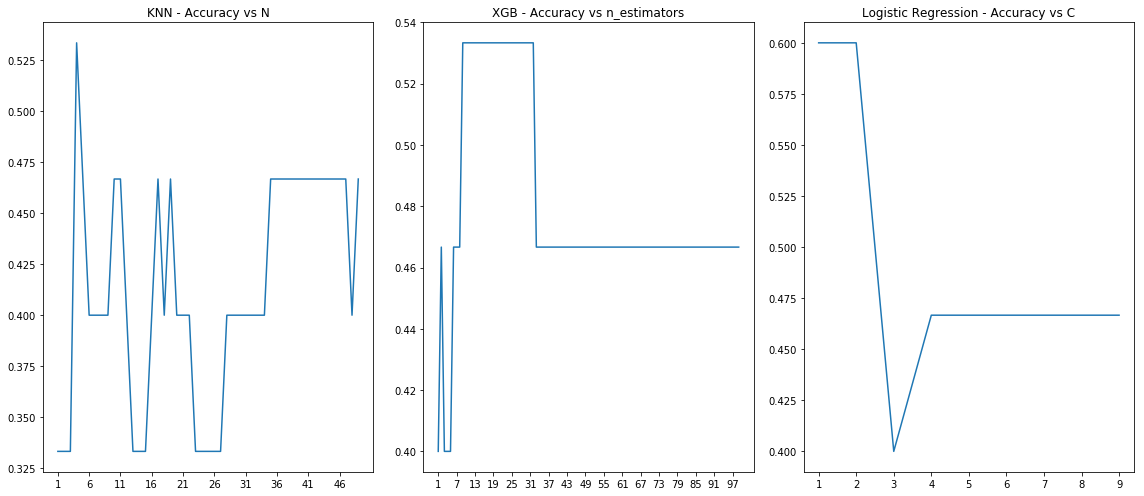

In [50]:
fig = plt.figure(figsize = (16,7))
# plt.style.use('ggplot')

ax1 = fig.add_subplot(1,3,1)
ax1.plot(range(1,50),plot_scores_knn);
ax1.set_title("KNN - Accuracy vs N")
ax1.set_xticks(range(1,50,5));

ax2 = fig.add_subplot(1,3,2)
ax2.plot(range(1,100),plot_scores_XGB);
ax2.set_xticks(range(1,100,6));
ax2.set_title("XGB - Accuracy vs n_estimators")

ax3 = fig.add_subplot(1,3,3)
ax3.plot(range(1,10),plot_scores_logreg);
ax3.set_xticks(range(1,10));
ax3.set_title("Logistic Regression - Accuracy vs C")

fig.tight_layout()

In [51]:
max_knn_n = max(plot_scores_knn)
max_knn_ind = plot_scores_knn.index(max_knn_n)

max_XGB_e = max(plot_scores_XGB)
max_XGB_ind = plot_scores_XGB.index(max_XGB_e) if plot_scores_XGB.index(max_XGB_e)!=0 else 1

max_logreg_c = max(plot_scores_logreg)
max_logreg_ind = plot_scores_logreg.index(max_logreg_c)

print(max_knn_n, max_knn_ind)
print(max_XGB_e, max_XGB_ind)
print(max_logreg_c, max_logreg_ind)

#max_knn_ind=15 
#max_XGB_ind=40
#max_logreg_ind=3



0.5333333333333333 3
0.5333333333333333 8
0.6 0


In [52]:
clf_knn = KNeighborsClassifier(n_neighbors=max_knn_ind).fit(X_train,y_train)
clf_XGB = XGBClassifier(n_estimators=max_XGB_ind).fit(X_train,y_train)
clf_logreg = LogisticRegression(C=max_logreg_ind,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

ZeroDivisionError: float division by zero

In [53]:
y_pred_knn = clf_knn.predict(X_predict)
y_pred_XGB = clf_XGB.predict(X_predict)
y_pred_logreg = clf_logreg.predict(X_predict)

c:\users\naomi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [54]:
this_week = test_table[['HomeTeam','AwayTeam']].loc[num_games:]
this_week['Result_knn']=y_pred_knn
this_week['Result_XGB']=y_pred_XGB
this_week['Result_logreg']=y_pred_logreg

In [55]:
this_week

,HomeTeam,AwayTeam,Result_knn,Result_XGB,Result_logreg
370,Arsenal,Liverpool,1,1,1
371,Everton,Chelsea,-1,1,1
372,Brighton,Watford,-1,0,1
373,Man City,Bournemouth,1,1,1
374,Southampton,Huddersfield,1,1,1
375,Stoke,West Brom,-1,1,-1
376,West Ham,Newcastle,-1,1,1
377,Swansea,Crystal Palace,1,-1,-1
378,Burnley,Tottenham,-1,1,1
379,Leicester,Man United,0,-1,1


In [56]:
def transformResultBack(row,col_name):
    if(row[col_name] == 1):
        return 'H'
    elif(row[col_name] == -1):
        return 'A'
    else:
        return 'D'

In [57]:
this_week["Res_knn"] = this_week.apply(lambda row: transformResultBack(row,"Result_knn"),axis=1)
this_week["Res_XGB"] = this_week.apply(lambda row: transformResultBack(row,"Result_XGB"),axis=1)
this_week["Res_logreg"] = this_week.apply(lambda row: transformResultBack(row,"Result_logreg"),axis=1)

this_week.drop(["Result_knn", "Result_XGB","Result_logreg"],axis=1,inplace=True)

In [58]:
print(max_knn_n, max_XGB_e, max_logreg_c)
this_week

0.5333333333333333 0.5333333333333333 0.6


,HomeTeam,AwayTeam,Res_knn,Res_XGB,Res_logreg
370,Arsenal,Liverpool,H,H,H
371,Everton,Chelsea,A,H,H
372,Brighton,Watford,A,D,H
373,Man City,Bournemouth,H,H,H
374,Southampton,Huddersfield,H,H,H
375,Stoke,West Brom,A,H,A
376,West Ham,Newcastle,A,H,H
377,Swansea,Crystal Palace,H,A,A
378,Burnley,Tottenham,A,H,H
379,Leicester,Man United,D,A,H
